                                      COVID-19 Data Analysis & Visualization Dashboard

                    ---------------------------- Importing Libraries ------------------------------------

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

                         ----------------------- Loading & Understanding the Data -------------------------------       

In [ ]:
#Load the dataset
de = pd.read_csv(r"C:\Users\aadis\Downloads\worldometer_coronavirus_summary_data.csv")

#Check first few rows
print(de.head())

In [36]:
#Basic info 
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    object 
 2   total_confirmed                 226 non-null    int64  
 3   total_deaths                    218 non-null    float64
 4   total_recovered                 204 non-null    float64
 5   active_cases                    204 non-null    float64
 6   serious_or_critical             145 non-null    float64
 7   total_cases_per_1m_population   226 non-null    int64  
 8   total_deaths_per_1m_population  218 non-null    float64
 9   total_tests                     212 non-null    float64
 10  total_tests_per_1m_population   212 non-null    float64
 11  population                      226 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [37]:
#Basic Description
de.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,2.260000e+02,2.180000e+02,2.040000e+02,2.040000e+02,145.000000,226.000000,218.000000,2.120000e+02,2.120000e+02,2.260000e+02
mean,2.305651e+06,2.884442e+04,2.256851e+06,6.861029e+04,269.482759,148156.809735,1157.550459,2.987445e+07,1.944650e+06,3.495521e+07
std,7.575510e+06,9.971254e+04,7.613357e+06,2.350430e+05,883.174727,155202.909225,1212.833590,1.079635e+08,3.318400e+06,1.390338e+08
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.093000e+03,8.050000e+02
25%,2.412600e+04,2.370000e+02,1.619300e+04,2.397500e+02,5.000000,11748.250000,172.500000,3.472968e+05,1.667260e+05,5.605125e+05
50%,1.793750e+05,2.251500e+03,1.372740e+05,1.634000e+03,17.000000,98271.500000,768.000000,2.238918e+06,7.753355e+05,5.800570e+06
75%,1.090902e+06,1.400650e+04,1.006245e+06,1.929675e+04,139.000000,255632.750000,1850.000000,1.233862e+07,2.267408e+06,2.187284e+07
max,8.420947e+07,1.026646e+06,8.124426e+07,1.938567e+06,8318.000000,704302.000000,6297.000000,1.016883e+09,2.184247e+07,1.439324e+09


In [49]:
# Renaming coloumns 
de.rename(columns = {
    "serious_or_critical":"critical",
    "total_deaths_per_1m_population":"totaldeaths_per1m",
    "total_tests_per_1m_population":"totaltests_per1m"} , inplace=True)

                         ------------------------------ Data Cleaning ------------------------------

In [39]:
#Handling missing values
# --> Filling unknow values
de["total_deaths"] = de["total_deaths"].fillna("unknown")
de["active_cases"] = de["active_cases"].fillna("unknown")
de["critical"] = de["critical"].fillna("unknown")

# --> Filling mean values
de["total_recovered"] = de["total_recovered"].fillna(de["total_recovered"].mean())
de["totaldeaths_per1m"] = de["totaldeaths_per1m"].fillna(de["totaldeaths_per1m"].mean())

# --> Filling forward/backward values
de["total_tests"] = de["total_tests"].fillna(method="ffill")
de["totaltests_per1m"] = de["totaltests_per1m"].fillna(method="bfill")

C:\Users\aadis\AppData\Local\Temp\ipykernel_22020\2697730632.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  de["total_tests"] = de["total_tests"].fillna(method="ffill")
C:\Users\aadis\AppData\Local\Temp\ipykernel_22020\2697730632.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  de["totaltests_per1m"] = de["totaltests_per1m"].fillna(method="bfill")


In [40]:
#Check null values
de.isnull().sum()


country                          0
continent                        0
total_confirmed                  0
total_deaths                     0
total_recovered                  0
active_cases                     0
critical                         0
total_cases_per_1m_population    0
totaldeaths_per1m                0
total_tests                      0
totaltests_per1m                 0
population                       0
dtype: int64

                         ----------------------------- Exploratory Data Analysis -----------------------------

In [41]:
#Change datatype
de["total_deaths"] = de["total_recovered"].astype(int)
de["total_recovered"] = de["total_recovered"].astype(int)

de.head(1)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,critical,total_cases_per_1m_population,totaldeaths_per1m,total_tests,totaltests_per1m,population
0,Afghanistan,Asia,179267,162202,162202,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636


In [42]:
#Create new columns
de["mortality_rate"] = (de["total_deaths"] / de["total_confirmed"] )*100
de["recovery_rate"] = (de["total_recovered"] / de["total_confirmed"] )*100

In [43]:
#Top 10 countries with the highest confirmed cases.
country_data = de.groupby('country')['total_confirmed'].sum()
top_10 = country_data.sort_values(ascending=False).head(10)
print(top_10)


country
USA            84209473
India          43121599
Brazil         30682094
France         29160802
Germany        25780226
UK             22159805
Russia         18260293
South Korea    17782061
Italy          17057873
Turkey         15053168
Name: total_confirmed, dtype: int64


In [44]:
#mean, median, and standard deviation of active cases
import pandas as pd
de = pd.read_csv(r"C:\Users\aadis\Downloads\worldometer_coronavirus_summary_data.csv")

# --> Mean
mean_activecases = de["active_cases"].mean()
print("Mean of active cases : ",mean_activecases)
# --> Median
median_activecases = de["active_cases"].median()
print("Median of active cases : ",median_activecases)
# --> Standard
standard_activecases = de["active_cases"].std()
print("Standard of active cases : ",standard_activecases)

Mean of active cases :  68610.29411764706
Median of active cases :  1634.0
Standard of active cases :  235043.02284974675


In [45]:
#continent with maximum global deaths
continent_data = de.groupby('continent')["total_deaths"].sum()
top1 = continent_data.sort_values(ascending=False).head(1)
print(top1)

continent
Europe    1830655.0
Name: total_deaths, dtype: float64


In [46]:
#Using groupby() to analyze trends by continent or country.
continent_data = de.groupby('continent')["total_deaths"].sum()

                     -------------------------------- Insights & Visualization -------------------------------- 

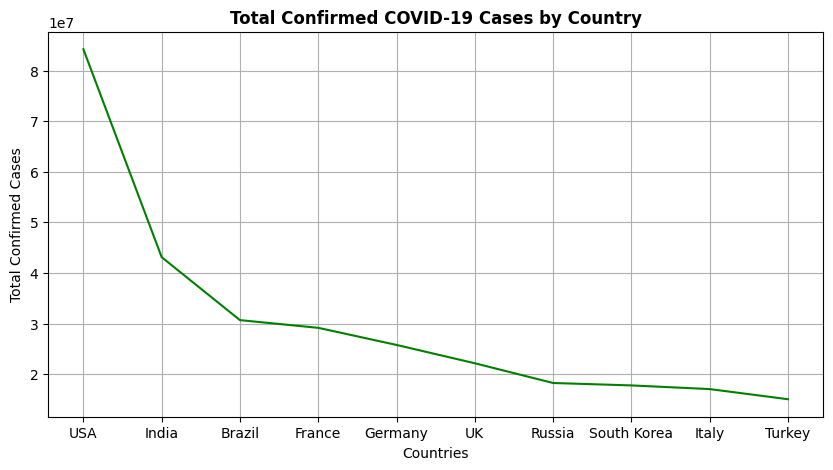

In [62]:
#Line chart -- showing total confirmed cases over country 

plt.figure(figsize=(10,5))
top10 = de.nlargest(10, 'total_confirmed')
sns.lineplot(data=de , x=top10["country"],y=top10["total_confirmed"],color="green")
plt.xlabel("Countries")
plt.ylabel("Total Confirmed Cases")                                                                    
plt.title("Total Confirmed COVID-19 Cases by Country",fontweight="bold")
plt.grid(":")
plt.show()


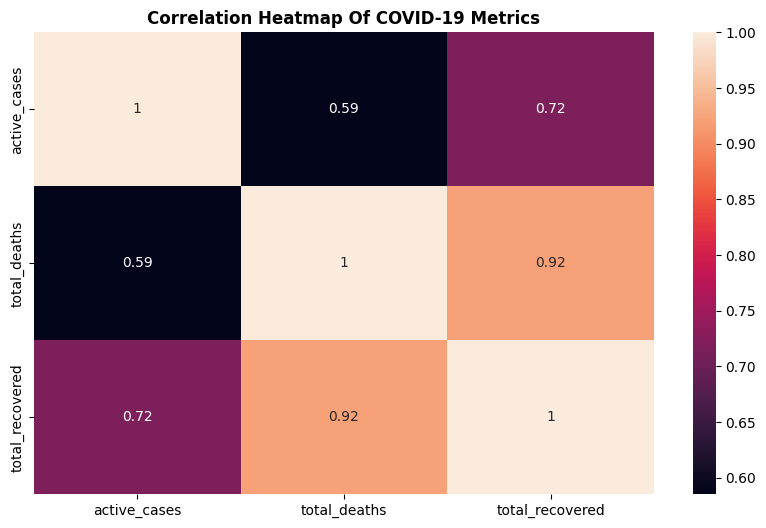

In [66]:
#Heatmap to show correlation between Confirmed, Deaths, and Recovered
import seaborn as sns

plt.figure(figsize=(10,6))
coloumns = ["active_cases","total_deaths","total_recovered"]
sns.heatmap(data=de[coloumns].corr() , annot=True,cmap="rocket")

plt.title("Correlation Heatmap Of COVID-19 Metrics",fontweight="bold")
plt.show()


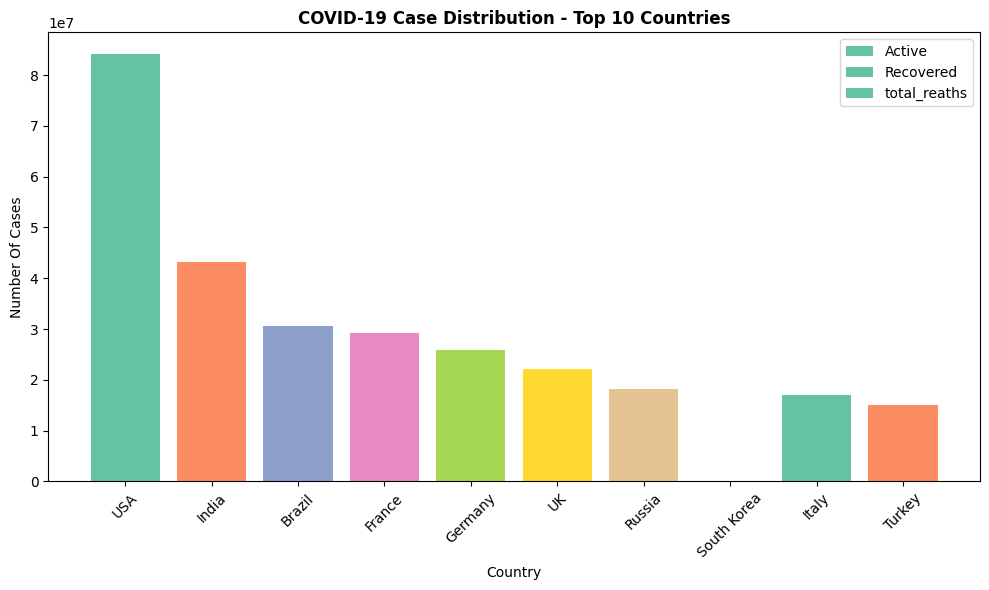

In [65]:
#Bar chart top 10 countries by confirmed cases
import matplotlib.pyplot as plt
import pandas as pd

top10 = de.nlargest(10, 'total_confirmed')
colour =sns.color_palette("Set2")
plt.figure(figsize=(10,6))
plt.bar(top10['country'], top10['active_cases'], label='Active', color=colour)
plt.bar(top10['country'], top10['total_recovered'], bottom=top10['active_cases'], label='Recovered', color=colour)
plt.bar(top10['country'], top10['total_deaths'], 
        bottom=top10['active_cases'] + top10['total_recovered'], label='total_reaths', color=colour)

plt.title("COVID-19 Case Distribution - Top 10 Countries",fontweight="bold")
plt.xlabel("Country")
plt.ylabel("Number Of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


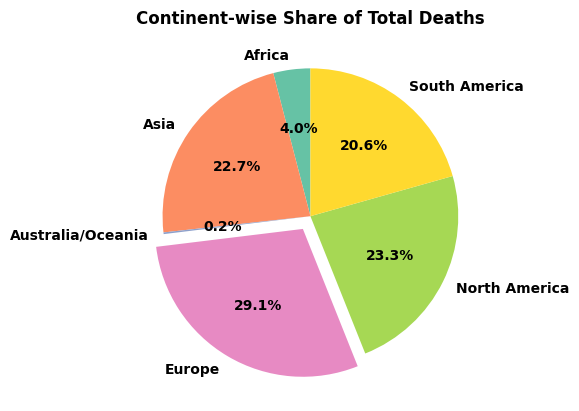

In [67]:
#Pie chart for continent-wise share 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

de = pd.read_csv(r"C:\Users\aadis\Downloads\worldometer_coronavirus_summary_data.csv")

# Group by Continent and sum the total deaths
continent_data = de.groupby("continent")["total_deaths"].sum()

continent = continent_data.index
total_deaths = continent_data.values

colours = sns.color_palette("Set2")
explodes = [0,0,0,0.1,0,0]
plt.pie(total_deaths, labels=continent, colors=colours, startangle=90, autopct='%1.1f%%',explode=explodes,textprops={'fontsize':10,'fontweight':'bold'})
plt.title("Continent-wise Share of Total Deaths",fontweight="bold")
plt.show()



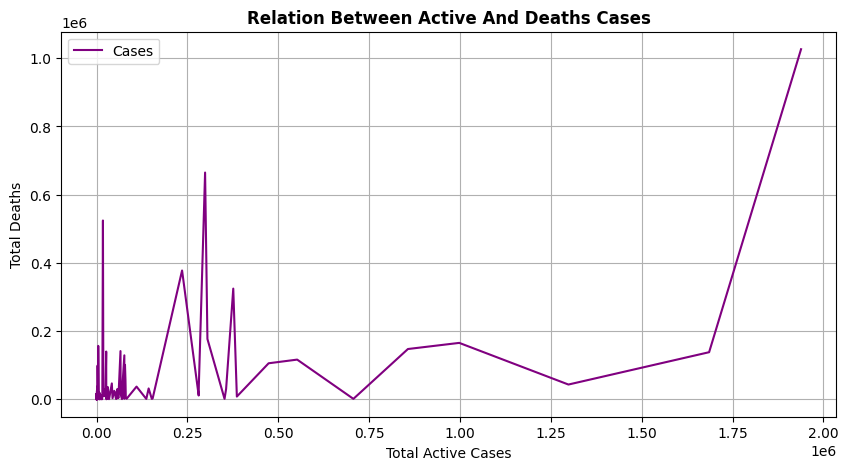

In [68]:
#Line chart showing total cases vs deaths

plt.figure(figsize=(10,5))
sns.lineplot(data=de,x="active_cases",y="total_deaths",linestyle="-",label="Cases",color="purple")
plt.xlabel("Total Active Cases")
plt.ylabel("Total Deaths")
plt.title("Relation Between Active And Deaths Cases",fontweight="bold")
plt.grid(":")
plt.legend()
plt.show()


### Key Insights
- The United States and India reported the highest total cases.
- Death rate correlates strongly with total cases.
- Testing capacity significantly impacts detected cases.

#### Conclusion
This analysis highlights the importance of large-scale testing and healthcare readiness.
Countries with higher testing rates generally report lower fatality ratios.